#### Preamble code

In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.datasets.samples_generator import make_blobs
from sklearn import datasets
import time
import sys

# Preliminaries: the $k$-means algorithm

$k$-means clustering aims to partition $n$ $d-$dimensional observations into $k$ clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.
The problem is computationally difficult (NP-hard); however, there are efficient heuristic algorithms that are commonly employed and converge quickly to a local optimum. In this Notebook we'll focus on one of them in particular: the Lloyd algorithm.

The $k$-means problem can be formalized as follows. Given a set of observations $(x_1, x_2, \cdots, x_n)$, where each observation is a $d$-dimensional real vector, $k$-means clustering aims to partition the $n$ observations into $k \leq n$ sets $S = \{S_1, S_2, \cdots, S_k\}$ so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance). 
The objective is to find:

$$
\arg \min_S \sum_{i=1}^{k} \sum_{x \in S_i} || \boldsymbol{x} - \boldsymbol{\mu_i} ||^2
$$

The most common algorithm uses an iterative refinement technique. Given an initial set of $k$ centroids $\mu_1^{(1)}, \cdots, \mu_k^{(1)}$ , the algorithm proceeds by alternating between two steps: in the **assignment step**, observations are associated to the closest **centroid**, in terms of squared Euclidean distance; in the **update step** new centroids are computed based on the new points associated to each centroid. Note: $\mu_i^{(t)}$ stands for the $i$-th centroid as of the $t$-th iteration. So $\mu_1^{(1)}$ is the centroid 1 at iteration 1.

## Algorithm pseudo-code
It is important to work on a principled approach to the design of large-scale algorithms, and this starts with using good data structures and scientific libraries, such as ```numpy``` and ```scipy```. In particular, we will focus on the use of ```numpy``` arrays, which come with efficient methods for array operations. A pseudo-code for the $k$-means algorithm is specified below:

```python
def kmeans(X, k, maxiter, seed=None):
    """
    specify the number of clusters k and
    the maximum iteration to run the algorithm
    """

    # randomly choose k data points as initial centroids
    centroids = X[rand_indices]
    
    for itr in range(maxiter):
        # ---------------
        # ASSIGNMENT STEP
        # ---------------
        # compute the distance matrix between each data point and the set of centroids
        distance_matrix = # row Index = data point Index; col Index = centroid Index; value=distance
        # assign each data point to the closest centroid
        cluster_assignment = # array Index = data point Index; array value = closest centroid Index
        
        # UPDATE STEP
        # select all data points that belong to cluster i and compute
        # the mean of these data points (each feature individually)
        # this will be our new cluster centroids
        new_centroids = ...
        
        # STOP CONDITION
        # if centroids == new_centroids => stop
 
    
```

# Synthetic data generation: working in bi-dimensional spaces

Next, we use sklearn to generate some synthetic data to test our algorithm.

In [21]:
X, y = make_blobs(n_samples = 300, centers = 4,
                  random_state = 0, cluster_std = 0.6)

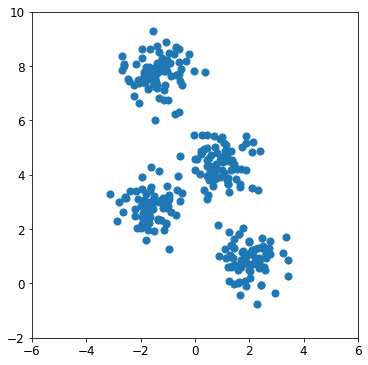

In [22]:
# change default figure and font size
plt.rcParams['figure.figsize'] = 8, 6 
plt.rcParams['font.size'] = 12

# scatter plot
plt.scatter(X[:, 0], X[:, 1], s = 50)
plt.ylim(-2, 10)
plt.xlim(-6, 6)
plt.gca().set_aspect('equal')
plt.show()


<div class="alert alert-block alert-info">
<strong>Question 1.</strong> Implement your own version of k-means, as a serial algorithm.

Follow the guidelines below:

<ul>
    <li> Define a function to perform k-means clustering. The function should accept as inputs: the training data x, the number of clusters k, and the iteration budget you allocate to the algorithm. Additional arguments might include the use of a random seed to initialize centroids.</li>
    <li>The function should output the centroids, and the cluster assignment, that is, to which centroid each data point is assigned to</li>
    <li> Optionally, keep track of the position of the centroids, for each iteration.</li>
</ul>

<br>
Once the ```kmeans``` function is defined, you can generate input data according to the cell above, that uses scikitlearn.
<br>

The output of your cell should contain the following information:
<ul>
    <li> Print the number of data points that belong to each cluster</li>
    <li> Plot the clustered data points:</li>
    <ul>
        <li>Using different colors for each cluster</li>
        <li>Plot the centroid positions for each cluster</li>
    </ul>
</ul>
</div>

In [23]:
def k_means(x, k,no_iterations, seed=None):
    '''
    Input:
        :param X: datapoints of the dataset
        :param k: number of clusters
        :param no_iterations: iteration budget of the algorithm
        :param seed: used for centroid initialization
    :return:
        : centroids: list of final centroids
        : cluster_assign: list of the cluster assignment for each datapoint
        : cluster_history: list of centroid history record
        : cluster_increment: the number of datapoints within each cluster

    '''

    # set seed for centroid initialization
    np.random.seed(seed)

    # select k datapoints as initial centroids
    centroids = np.array(x[np.random.choice(len(x), k, replace=False), :])
    
    # history record for the centroid at each iteration
    centroids_history = []

    # add initial centroid to history record
    centroids_history.append(centroids)

    for iter in np.arange(no_iterations):

        # assignment step

            # compute the distance matrix between each datapoints and each centroids
            dist_mat = cdist(x,centroids,'euclidean')
            
            # determine the centroid which has the minimum distance for each datapoint
            cluster_assign = [np.argmin(point) for point in dist_mat]
      
            # number of datapoint for each one of the k cluster
            cluster_increment = np.zeros(k)
            
            # array of new centroids to be computed in the update step
            new_centroids = np.zeros((k,2))
            
        # update step
            for point,assigned_c in zip(x,cluster_assign):
                # add the coordinates of the point belonging to cluster c of value "assigned_c"
                new_centroids[assigned_c] += point
                cluster_increment[assigned_c] += 1
                
            # compute the average (new centroid) of the datapoints belonging to a cluster
            # the centroid stays as the previous one if no assignments were obtained for it
            new_centroids = [new_centroids[i]/cluster_increment[i] if cluster_increment[i]!=0 else centroids[i] for i in np.arange(k)]
           

            # check if the algorithm reached convergence (no change in centroids)
            if np.array_equal(centroids,new_centroids):
                break

            centroids = new_centroids

            #update history record
            centroids_history.append(centroids)

    return centroids, cluster_assign, centroids_history, cluster_increment



The total runtime of the serial algorithm, in seconds  0.01471257209777832

The number of datapoints belonging to cluster 0 is:
 75.0

The number of datapoints belonging to cluster 1 is:
 75.0

The number of datapoints belonging to cluster 2 is:
 75.0

The number of datapoints belonging to cluster 3 is:
 75.0


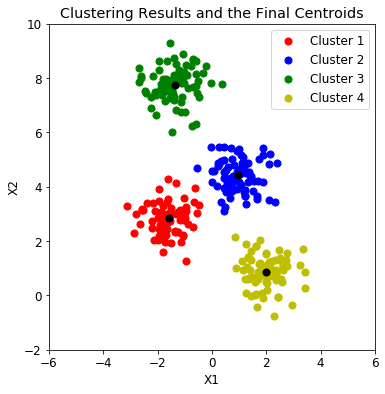

In [24]:
T0 = time.time()
centroids, cluster_assign, centroid_history, cluster_increment = k_means(x = X, k = 4, no_iterations = 30, seed = None)
T1 = time.time()

Total_Runtime = T1 - T0

print('\n'+'\033[1m'+"The total runtime of the serial algorithm, in seconds "+'\033[0m', Total_Runtime)

# colors dictionary for the cluster points
color = {0: 'r',1: 'b', 2: 'g', 3: 'y'}

for i in np.arange(4):
    print("\nThe number of datapoints belonging to cluster",i,"is:\n",cluster_increment[i])

    indexes_datapoint_in_cluster_i = [j for j in range(len(X)) if cluster_assign[j] == i]
    # scatter plot
    plt.scatter(X[indexes_datapoint_in_cluster_i, 0], X[indexes_datapoint_in_cluster_i,1], s=50, color = color[i])
    plt.scatter(centroids[i][0], centroids[i][1], s=50, color = 'black',label='_nolegend_')


plt.ylim(-2, 10)
plt.xlim(-6, 6)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(['Cluster 1','Cluster 2', 'Cluster 3','Cluster 4'])
plt.title('Clustering Results and the Final Centroids')
plt.gca().set_aspect('equal')

plt.show()

<div class="alert alert-block alert-info">
<strong>Question 2.</strong> Use the built-in k-means implementation in sklearn and determine centroids and clusters.

Follow the guidelines below:

<ul>
    <li> Use the KMeans algorithm from sklearn</li>
    <li> Use the fit_predict method to cluster data</li>
    <li> Use the cluster_centers_ method to retrieve centroids</li>
</ul>

The output of your cell should contain the following information:
<ul>
    <li> Plot the clustered data points, using the same code your have produced for Question.1</li>
    <ul>
        <li>Using different colors for each cluster</li>
        <li>Plot the centroid positions for each cluster</li>
    </ul>
</ul>
</div>

Using SKLearn:


The number of datapoints belonging to cluster 0 is:
 75.0

The number of datapoints belonging to cluster 1 is:
 75.0

The number of datapoints belonging to cluster 2 is:
 75.0

The number of datapoints belonging to cluster 3 is:
 75.0


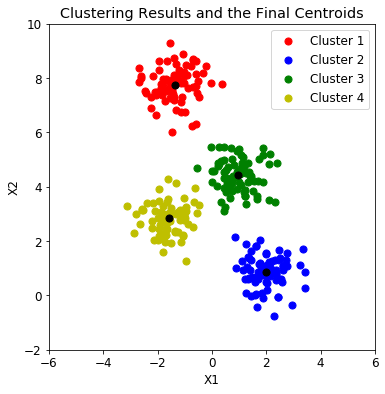

In [6]:
# initial kmeans object in sklearn
kmeans = KMeans(n_clusters= 4, max_iter=10)

# assign the clusters to the datasets
sklearn_assign = kmeans.fit_predict(X)
sklearn_centroids = kmeans.cluster_centers_

# colors list for
color = {0: 'r',1: 'b', 2: 'g', 3: 'y'}

print("Using SKLearn:\n")

for i in np.arange(4):
    print("\nThe number of datapoints belonging to cluster",i,"is:\n",cluster_increment[i])

    indexes_datapoint_in_cluster_i = [j for j in range(len(X)) if sklearn_assign[j] == i]
    # scatter plot
    # plot the datapoints belonging to cluster i in the same color
    plt.scatter(X[indexes_datapoint_in_cluster_i, 0], X[indexes_datapoint_in_cluster_i,1], s=50, color = color[i])
    
    # plot the centroid of cluster i
    plt.scatter(sklearn_centroids[i][0], sklearn_centroids[i][1], s=50, color = 'black',label='_nolegend_')


plt.ylim(-2, 10)
plt.xlim(-6, 6)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(['Cluster 1','Cluster 2', 'Cluster 3','Cluster 4'])
plt.title('Clustering Results and the Final Centroids')
plt.gca().set_aspect('equal')

plt.show()

<div class="alert alert-block alert-info">
<strong>Question 3.</strong> Use the sklearn dataset API to generate alternative synthetic data to test your k-means algorithm implementation.

Follow the guidelines from this document: http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py


The output of your cell should contain the following information:
<ul>
    <li> Plot the new synthetic dataset you generated
    <li> Plot the clustered data points, using the same code your have produced for Question.1</li>
    <ul>
        <li>Using different colors for each cluster</li>
        <li>Plot the centroid positions for each cluster</li>
    </ul>
</ul>
</div>

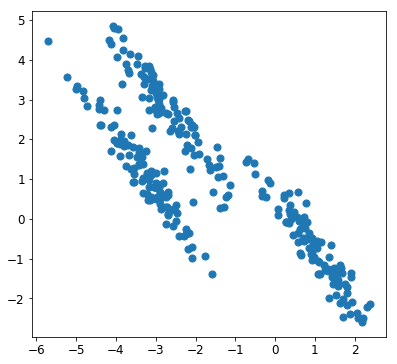

In [7]:
# data, y = datasets.make_blobs(n_samples=300,
#                              cluster_std=[3, 2.5, 2],
#                              random_state=100)

random_state = 170
data, y = datasets.make_blobs(n_samples=300, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
data = np.dot(data, transformation)

# scatter plot
plt.scatter(data[:,0],data[:,1], s = 50)
plt.gca().set_aspect('equal')
plt.show()


The number of datapoints belonging to cluster 0 is:
 96.0

The number of datapoints belonging to cluster 1 is:
 101.0

The number of datapoints belonging to cluster 2 is:
 103.0


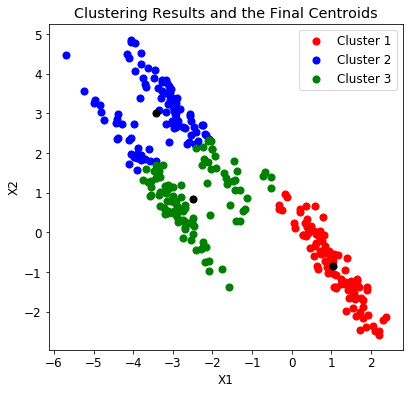

In [8]:
centroids, cluster_assign, centroid_history, cluster_increment = k_means(x = data, k = 3, no_iterations = 10, seed = 65)

# colors list for
color = {0: 'r',1: 'b', 2: 'g'}

for i in np.arange(3):
    print("\nThe number of datapoints belonging to cluster",i,"is:\n",cluster_increment[i])

    indexes_datapoint_in_cluster_i = [j for j in range(len(X)) if cluster_assign[j] == i]
    # scatter plot
    plt.scatter(data[indexes_datapoint_in_cluster_i, 0], data[indexes_datapoint_in_cluster_i,1], s=50, color = color[i])
    plt.scatter(centroids[i][0], centroids[i][1], s=50, color = 'black',label='_nolegend_')

plt.gca().set_aspect('equal')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(['Cluster 1','Cluster 2', 'Cluster 3','Cluster 4'])
plt.title('Clustering Results and the Final Centroids')

plt.show()

***

# A simplified analysis of algorithm convergence

One well-known weakness of $k$-means is that the algorithm's performance is closely tied with the randomly generated initial centroids' quality. If the algorithm starts with a set of bad inital centers, it will get stuck in a local minimum.

Instead of taking a formal approach to study the convergence of $k$-means, let's study it with an experimental approach. One thing we can do is to build a measure of clustering quality: intuitively, a good clustering result should produce clusters in which data points should be very close to their centroids, and very far from other centroids. In this Notebook, we'll look at a metric called the **total within Sum of Squares**, which is sometimes referred ot as heterogeneity. Mathematically, we define heterogeneity as:

$$
\mathcal{H} = \sum_{j=1}^{k} \sum_{i: z_i=j} || \boldsymbol{x_i} - \boldsymbol{\mu_j}||_{2}^{2}
$$

Where $k$ denotes the total number of clusters, $x_i$ is the $i$-th data point, $\mu_j$ is the $j$-th centroid, and $|| \cdot ||_{2}^{2}$ denotes the squared L2 norm (Euclidean distance) between the two vectors.

<div class="alert alert-block alert-info">
<strong>Question 4.</strong> Modify your own version of k-means, to compute heterogeneity as defined above.

Follow the guidelines below:

<ul>
    <li>Use the same method template you used in Question 1</li>
    <li>Add the code required to compute heterogeneity</li>
    <li>The function should return, in addition to the same return values as for the baseline version, the computed heterogeneity
</ul>
</div>

In [9]:
def k_means_heterogeneity(x, k,no_iterations, seed):
    '''
    Input:
        :param X: datapoints of the dataset
        :param k: number of clusters
        :param no_iterations: iteration budget of the algorithm
        :param seed: used for centroid initialization
    :return:
        : centroids: list of final centroids
        : cluster_assign: list of the cluster assignment for each datapoint
        : cluster_history: list of centroid history record
        : cluster_increment: the number of datapoints within each cluster
        : heterogeneity : total within Sum of Squares

    '''

    # set seed for centroid initialization
    np.random.seed(seed)

    # select k datapoints as initial centroids
    centroids = np.array(x[np.random.choice(len(x), k, replace=False), :])
    
    # history record for centroids at each iteration
    centroids_history = []

    # add initial centroids to history record
    centroids_history.append(centroids)

    for iter in np.arange(no_iterations):

        # assignment step

            # compute the distance matrix between each datapoints and each centroids
            dist_mat = cdist(x,centroids,'euclidean')

            # determine the centroid which has the minimum distance for each datapoint
            cluster_assign = [np.argmin(point) for point in dist_mat]

            # number of datapoint for each one of the k cluster
            cluster_increment = np.zeros(k)

            # centroids to be computed in the update step
            new_centroids = np.zeros((k,2))

        # update step
            for point,assigned_c in zip(x,cluster_assign):
                # add the coordinates of the point belonging to cluster c of value "assigned_c"
                new_centroids[assigned_c] += point
                # compute the number of assigned datapoint for each cluster
                cluster_increment[assigned_c] += 1


            # compute the average (new centroid) of the datapoints belonging to a cluster
            new_centroids = [new_centroids[i]/cluster_increment[i] if cluster_increment[i]!=0 else centroids[i] for i in np.arange(k)]


            # check if the algorithm reached convergence
            if np.array_equal(centroids,new_centroids):
                break

            centroids = new_centroids

            #update history record
            centroids_history.append(centroids)
            
    distances = np.zeros(k)

    for point,assigned_c in zip(x,cluster_assign):
        # Sum of Squares for cluster having the id 'assigned_c'
        # inner sum
        distances[assigned_c] += np.linalg.norm(point - centroids[assigned_c])

    # outer sum (for all the clusters)
    heterogeneity = np.sum(distances)

    return centroids, cluster_assign, centroids_history, cluster_increment, heterogeneity


<div class="alert alert-block alert-info">
<strong>Question 5.</strong> Using the modified k-means method you designed, study algorithm convergence as a function of heterogeneity.

Follow the guidelines below:

<ul>
    <li>Run the modified k-means for at least 5 different initial seed values</li>
    <li>Prepare a dictionary data structure containing: key = random seed, value = heterogeneity</li>
    <li>Print seed, heterogeneity values</li>
</ul>

Add your personal comment about the convergence properties of the $k$-means algorithm.

</div>

In [10]:
# seed/heterogeneity dictionary
dict_seed_heterogeneity = {}

# list of arbitrary seed values
seeds = [3,7,12,33,43,54,78]

print('Seed\tHeterogeneity')

avg_heterogenity_baseline = 0

for s in seeds:
    centroids, cluster_assign, centroid_history, cluster_increment, heterogeneity = k_means_heterogeneity(x = data, k = 3, no_iterations = 10, seed = s)
    dict_seed_heterogeneity[s] = heterogeneity
    avg_heterogenity_baseline += heterogeneity
    print(s,'\t',heterogeneity)
avg_heterogenity_baseline /= len(seeds)

Seed	Heterogeneity
3 	 330.885920125
7 	 300.82070175
12 	 289.130856838
33 	 291.105895558
43 	 289.537748334
54 	 289.130856838
78 	 288.824251571


<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
The observed output showing the value of the heterogeneity for each seed value indicates that the choice of the initial centroids affect how the algorithm and how the clustering converges. For example, for 2 different seed values, the heterogeneity value can differ significantly. Therefore, bad initilization of centroids in the K-means algorithm may lead to unsatisfactory results by converging to bad <b>local optima</b> and thus the choice of the initial centroids should be taken into consideration to have a proper convergence using K-means.
    </div>

***

# A technique for a smart centroid initialization: $k$-means++

One effective way to produce good initial centroids to feed to $k$-means is to proceed as follows: instead of randomly generating initial centroids, we will try to spread them out in our $d$-dimensional space, such that they are not "too close" to eachother. If you are interested in the details of this technique, you should refer to the link to the original research paper below: in summary, the $k$-means++ technique allows to improve the quality of the local optima in which $k$-means settles, and to reduce the average runtime of the algorithm.

k-means++: the advantages of careful seeding, by David Arthur and Sergei Vassilvitskii (Stanford University) https://dl.acm.org/citation.cfm?id=1283494

A simplified workflow of the $k$-means++ approach is as follows:


* Choose a data point at random from the dataset, this serves as the first centroid
* Compute the squared euclidean distance of all other data points to the randomly chosen first centroid
* To generate the next centroid, each data point is chosen with the probability (weight) of its squared distance to the chosen center in the current round, divided by the the total squared distance (this is just a normalization to make sure the probability adds up to 1). In other words, a new centroid should be as far as possible from the other centroids
* Next, recompute the probability (weight) of each data point as the minimum of the distance between it and all the centers that are already generated (e.g. for the second iteration, compare the data point's distance between the first and second center and choose the smaller one)
* Repeat step 3 and 4 until we have $k$ initial centroids to feed to the $k$-means algorithm


<div class="alert alert-block alert-info">
<strong>Question 6.</strong> Modify your own version of k-means, to introduce the smart initialization technique described above. Don't forget to keep track of heterogeneity as well! The whole point is to measure if k-means++ really improves on this metric.

<br>
<br>

Follow the guidelines below:

<ul>
    <li>Use the same method template you used in Question 1</li>
    <li>Add the code required to compute the initial clusters according to k-means++</li>
    <li>Add the code required to compute heterogeneity</li>
    <li>The function should return, in addition to the same return values as for the baseline version, the computed heterogeneity
</ul>
</div>

In [11]:
def k_means_pp(x, k,no_iterations, seed):
    '''
    Input:
        :param X,y: datapoints of the dataset
        :param k: number of clusters
        :param no_iterations: iteration budget of the algorithm
        :param seed: used for centroid initialization
    :return:
        : centroids: list of final centroids
        : cluster_assign: list of the cluster assignment for each datapoint
        : cluster_history: list of centroid history record
        : cluster_increment: the number of datapoints within each cluster
        : heterogeneity : total within Sum of Squares

    '''

    # set seed for centroid initialization
    np.random.seed(seed)

    # select the initial centroid randomly from the datapoints
    initial_centroid = x[np.random.choice(len(x)), :]
    
    # list of centroids
    centroids = []
    
    # centroid history record
    centroids_history = []
    
    # add initial centroid
    centroids.append(initial_centroid.tolist())
    
    # list of distances to the first centroid (distance matrix /column for each centroid)
    distances = cdist(x,[initial_centroid])
    
    # list of probabilities
    probabilities = []
    
    # initialize normalization factor
    normalization_factor = 0
    
    # compute the normalization factor as the sum of the distances
    normalization_factor = np.sum(distances)
    
    # compute the probabilities
    probabilities = distances/normalization_factor
    
    # determine the point having the highest probability
    next_centroid = x[np.argmax(probabilities)]
    
    # add new centroid to the list of centroids
    centroids.append(next_centroid.tolist())
    
    # starting from the 3rd centroid we use the following loop
    for c in np.arange(2,k):
        
        # add the distances to the new centroid to the distance matrix
        # this is done to avoid recalculation of distances for the previous computed centroids
        distances = np.column_stack((distances,cdist(x,[centroids[-1]])))
        
        # pick the minimum distance for each datapoint over the centroid
        distances_min = [np.min(point_distances) for point_distances in distances]
        
        # calculate the sum of these distances 
        normalization_factor = np.sum(distances_min)
        
        # compute the probabilities
        probabilities = distances_min/normalization_factor
        
        # pick the datapoint having the highest probability
        next_centroid = x[np.argmax(probabilities)]
        
        # add the centroid to the list of centroids
        centroids.append(next_centroid.tolist())
        
    
    
    # add initial centroids to history record
    centroids_history.append(centroids)
    
    for iter in np.arange(no_iterations):

        # assignment step

            # compute the distance matrix between each datapoints and each centroids
            dist_mat = cdist(x,centroids,'euclidean')

            # determine the centroid which has the minimum distance for each datapoint
            cluster_assign = [np.argmin(point) for point in dist_mat]

            # number of datapoint for each one of the k cluster
            cluster_increment = np.zeros(k)

            new_centroids = np.zeros((k,2))

        # update step
            for point,assigned_c in zip(x,cluster_assign):
                # add the coordinates of the point belonging to cluster c of value "assigned_c"
                new_centroids[assigned_c] += point
                cluster_increment[assigned_c] += 1


            # compute the average (new centroid) of the datapoints belonging to a cluster
            new_centroids = [new_centroids[i]/cluster_increment[i] if cluster_increment[i]!=0 else centroids[i] for i in np.arange(k)]


            # check if the algorithm reached convergence
            if np.array_equal(centroids,new_centroids):
                break

            centroids = new_centroids

            #update history record
            centroids_history.append(centroids)
            
    distances = np.zeros(k)

    # compute inner sum of squares
    for point,assigned_c in zip(x,cluster_assign):
        # Sum of Squares for cluster having the id 'assigned_c'
        distances[assigned_c] += np.linalg.norm(point - centroids[assigned_c])

    # compute outer sum
    heterogeneity = np.sum(distances)

    return centroids, cluster_assign, centroids_history, cluster_increment, heterogeneity


The number of datapoints belonging to cluster 0 is:
 96.0

The number of datapoints belonging to cluster 1 is:
 103.0

The number of datapoints belonging to cluster 2 is:
 101.0

The value of heterogeneity in the KMeans++ Implementation is:
 289.537748334


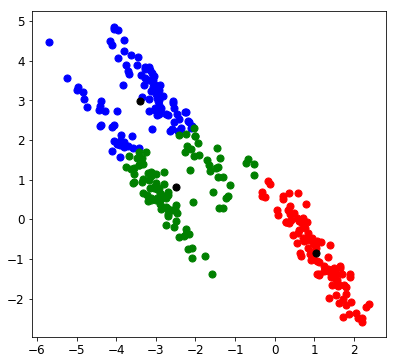

In [12]:
centroids, cluster_assign, centroid_history, cluster_increment, heterogeneity = k_means_pp(x = data, k = 3, no_iterations = 10, seed = None)

# colors list for
color = {0: 'r',1: 'b', 2: 'g'}

for i in np.arange(3):
    print("\nThe number of datapoints belonging to cluster",i,"is:\n",cluster_increment[i])

    indexes_datapoint_in_cluster_i = [j for j in range(len(X)) if cluster_assign[j] == i]
    # scatter plot
    plt.scatter(data[indexes_datapoint_in_cluster_i, 0], data[indexes_datapoint_in_cluster_i,1], s=50, color = color[i])
    plt.scatter(centroids[i][0], centroids[i][1], s=50, color = 'black')

plt.gca().set_aspect('equal')

print('\nThe value of heterogeneity in the KMeans++ Implementation is:\n',heterogeneity)

plt.show()

<div class="alert alert-block alert-info">
<strong>Question 7.</strong> Similarly to question 5, using the modified k-means method you designed, study algorithm convergence as a function of heterogeneity.
<br>
<br>


Follow the guidelines below:

<ul>
    <li>Run the modified k-means for at least 5 different initial seed values</li>
    <li>Prepare a dictionary data structure containing: key = random seed, value = heterogeneity</li>
    <li>Print seed, heterogeneity values</li>
</ul>

<br>

One additional question to answer is the following: print the average heterogeneity for the baseline k-means algorithm, and the average heterogeneity when using the k-means++ initialization. Compare and comment with your own words.
</div>

In [13]:
# seed/heterogeneity dictionary
dict_seed_heterogeneity = {}


print('Seed\tHeterogeneity')
avg_heterogeneity_pp = 0

# using the same seed values used in the previous study
for s in seeds:
    centroids, cluster_assign, centroid_history, cluster_increment, heterogeneity = k_means_pp(x = data, k = 3, no_iterations = 10, seed = s)
    dict_seed_heterogeneity[s] = heterogeneity
    print(s,'\t',heterogeneity)
    avg_heterogeneity_pp += heterogeneity

avg_heterogeneity_pp /= len(seeds)
print('\nFor the baseline KMeans algorithm, the average heterogeneity is:\n', avg_heterogenity_baseline)
print('\nFor the baseline KMeans++ algorithm, the average heterogeneity is:\n', avg_heterogeneity_pp)

Seed	Heterogeneity
3 	 290.005037019
7 	 288.824251571
12 	 289.466742508
33 	 289.537748334
43 	 289.130856838
54 	 289.537748334
78 	 289.466742508

For the baseline KMeans algorithm, the average heterogeneity is:
 297.062318716

For the baseline KMeans++ algorithm, the average heterogeneity is:
 289.424161016


<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
This in fact signifies that the choice of the initial centroids is crucial to the result and the converges of the algorithms. The average value of the heterogeneity over multiple seeds for the KMeans++ algorithms is below that of the baseline KMeans algorithm.<br>
In the KMeans++ algorithm, the centroids are initialized in such a way that they are as far as possible from each other so that it could converge to a good optimum. This is an advantage since the centroids which are close to each other can result in a different covergence and reach a bad local optimum (which was shown in the heterogeneity values in the baseline version) which may lead to a different clustering results.
</div> 


***

# Determining the value of k: a simple and visual approach, called the Elbow method

Another problem of $k$-means is that we have to specify the number of clusters $k$ before running the algorithm, which we often don't know a priori. 
There are many different heuristics for choosing a suitable value for $k$, the simplest one being the **Elbow method**. Essentially, the idea is to run the $k$-means algorithm using different values of $k$ and plot the corresponding heterogeneity. This measure will decrease as the number of clusters increases, because each cluster will be smaller and tighter. 
By visual inspection of the plot heterogeneity vs. $k$, we will (hopefully!) see that the curve flattens out at some value of $k$: this is what we call an "elbow", and we'll select the value of $k$ corresponding to the "elbow" position.


<div class="alert alert-block alert-info">
<strong>Question 8.</strong> Using the k-means algorithm you implemented, including the smart initialization technique, collect into an array the value of heterogeneity as a function of the number of clusters k, where k is to be selected in the range [2,10].
<br>
<br>


Your output cell should contain:

<ul>
    <li>The plot of heterogeneity vs. k</li>
    <li>A discussion on your visual inspection of the curve, together with a justification for an appropriate choice of the value k</li>
</ul>
</div>

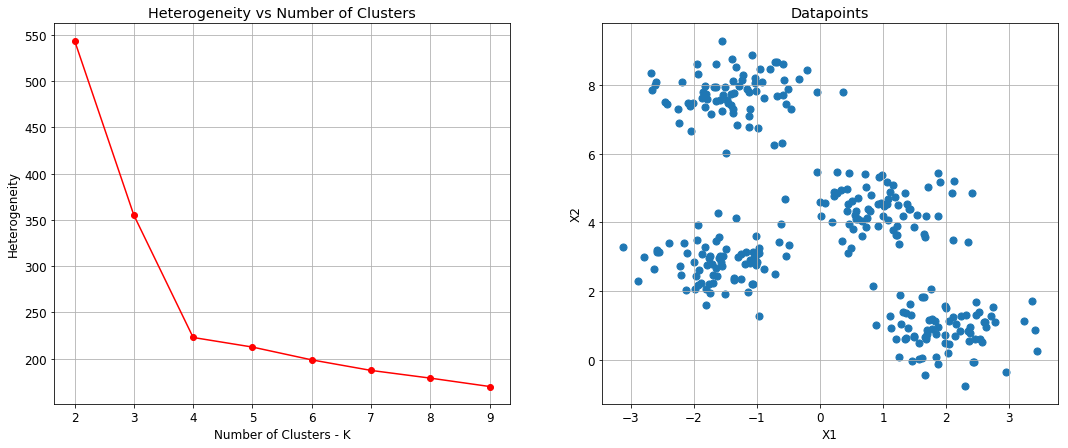

In [14]:
# list of heterogeneities
heterogeneities = []

# run KMeans for muliple values of k
for k in np.arange(2,10):
    # apply clustering by KMeans
    _, _, _, _, heterogeneity = k_means_pp(x = X, k = k, no_iterations = 10, seed = 1)
    # add the heterogeneity for the current value of k
    heterogeneities.append(heterogeneity)

    
figure, axes = plt.subplots(1,2,figsize=(18,7))

#figure.set_size_inches(10, 10)

axes[0].plot(np.arange(2,10),heterogeneities,'-o',color='red')
axes[0].set_ylabel("Heterogeneity")
axes[0].set_xlabel("Number of Clusters - K")
axes[0].set_title("Heterogeneity vs Number of Clusters")
axes[0].grid(True)

axes[1].scatter(X[:, 0], X[:, 1], s = 50)
axes[1].set_ylabel("X2")
axes[1].set_xlabel("X1")
axes[1].set_title("Datapoints")
axes[1].grid(True)


<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
As shown in the plot and by visual inspection, the curve of the heterogeneity as a function of the number of clusters k seems to flatten out at k = 4 which actually represents the elbow postition.<br>
This result actually makes sense, since if we look at the datapoints in the second figure, they represent 4 groups (clusters) in which each of them appears as a cluster by itself. Thus, it is most probable for such a dataset to have 4 clusters. This verifies the result and the position of the elbow obtained in the curve of the heterogeneity as a function of the number of clusters k.
</div>
    

***

# Distributed $k$-means with PySpark

We're now ready to work on a distributed implmentation of the $k$-means algorithm, using the PySpark API.

By now, you should be rather familiar with the $k$-means algorithm, which means we can focus on its parallel and distributed design.

## Distributed algorithm pseudo code

The basic idea of distributed $k$-means is as follows: data points to be clustered should be stored as a distributed dataset, namely a RDD. As in the Notebook on distributed SGD, we will take a shortcut and avoid using HDFS RDDs: rather, we'll use sklearn to generate the data points, similary to the serial version of the algorithms, then use the ```parallelize()``` method to create an RDD, and determine the number of partitions.

We also need to manipulate the centroids array: indeed, all machines should hold a copy of the centroid vector, such that they can proceed independently and in parallel in the first phase of the $k$-means algorithm, that is the **assignment step**. Specifically, every worker has a set of data points, and it will use a copy of the centroid vector to compute cluster assignement: we compute the distance between each data point and each centroid, to assign data points to their closest centroid.

Once the assignement step is done, we need to recompute new centroids based on the assignement, that is, we execute the **update step**. Clearly, we will need to **shuffle** data over the network such that we will have, for each current centroid, the list of all data points that have been assigned to it. If you think about it, this problem should be familiar!! This is very similar to what we do in the Word Count example. As such, you will need to make sure the output of the update step is cast to a ```<key, value>``` type, where the key corresponds to a centroid identifier, and the value contains the list of data points associated to that centroid. The framework will take care of the distributed group by operation, and organize data according to the semantic of our algorithm.

**NOTE:** since we will (potentially) work on large dataset sizes, we don't want our algorithm to return the final assignement after convergence, for otherwise we would need to collect a large amount of data in the driver machine, which has a finite and somehow limited amount of RAM.

The pseudo code of the algorithm you need to implement is as follows:

```python
datapoints = # Use sklearn, as usual, and work on blobs
centroids = # Random initialization

for itr in range(maxiter): # This for loop is executed by the driver
    bcCentroids = sc.broadcast(centroids) # Use broadcast variables
    
    closest = datapoints.mapPartition(assignement_step) # This should happen in parallel
    
    centroids = closest.reduceByKey(update_step_sum). \ # This should happen in parallel
        map(update_step_mean). \ # This should happen in parallel
        collect() # Here we collect new centroids in the driver
```

As you can see from the pseudo code, you need to figure out how to implement the ```assignement_step``` function and the update_step function. For the latter, the pseudo code gives you a big hint! Remember what we discussed in class about computing the mean!

<div class="alert alert-block alert-info">
<strong>Question 9.</strong> Implement the distributed version of the k-means algorithm, following the guidelines in the pseudo code.
<br>
<br>

Your output cell should contain:

<ul>
    <li>The value of the centroids once the algorithm converges</li>
    <li>The total runtime of the distributed algorithm, in seconds</li>
    <li>A visualization of the data points and the computed centroids</li>
</ul>
</div>

In [15]:
def Distribution_Kmeans(X, k, maxiter, seed=None, n_partitions=6):
    '''
    Input:
        :param X: datapoints of the dataset
        :param k: number of clusters
        :param maxiter: iteration budget of the algorithm
        :param seed: used for centroid initialization
        :param n_partitions: the number of partitions into which we want to partition the dataset
    :return:
        : centroids: list of final centroids

    '''
    # set seed for centroid initialization
    np.random.seed(seed)

    # select k datapoints as initial centroids
    centroids = np.array(X[np.random.choice(len(X), k, replace=False), :])
    
    # This function applies the assignment step on each data partition that a worker is responsible of.
    def assignement_step(data_partition):
        
     # assignment step
    
        for x in data_partition:
           # compute the distance vector between a datapoints and each centroids
            dist_mat = pairwise_distances([x], centroids_bc.value, metric='sqeuclidean') 
           
            # Referencing each datapoint with a Cluster ID
            Cluster_ID = np.argmin(dist_mat)
            
            # As a generator: we are using yield to send the output on every iteration
            yield (Cluster_ID,[x, 1])

    # This function compute the sum of points and the number of points for each Cluster
    # knowing that the reduceByKey() is aware about the Keys (cluster ID)
    def update_stem_step(Point1,Point2):
        return ((Point1[0]+Point2[0], Point1[1]+Point2[1]))
  
    # This function compute the new centroid for each cluster using the O/P of update_stem_step() function
    # by dividing the sum of coordinates given by update_stem_step() by the number of datapoints for each cluster
    def map_average(Sum):
        return ((Sum[1][0]/Sum[1][1]))
    
    # Parallelize data into n_partitions
    data = sc.parallelize(X, n_partitions).cache()
    
   
   
    for n in range(maxiter):
        
        # broadcast the centroids
        centroids_bc= sc.broadcast(centroids)
       
        # assign datapoints to clusters for each partition
        closest=data.mapPartitions(assignement_step)
        
        #Calculate New Centroids
        New_Centroids=(
            # for each cluster (key), calculate:
            # the sum of the coordinates
            # the number of datapoints in the cluster
            closest.reduceByKey(update_stem_step)
            
            # divide the sum of coordinates by the number of points in each cluster to compute the new centroids
            .map(map_average)
            
            # extract the output (centroids) to the driver machine
            .collect()
        )
       
        # Stop Condition
        if(np.array_equal(centroids, New_Centroids)):
            break
            
        # Keep the centroids updated
        centroids =New_Centroids        
        
    return np.array(centroids) 

Centroids:
[[ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]]

The total runtime of the distributed algorithm, in seconds  1.9761459827423096


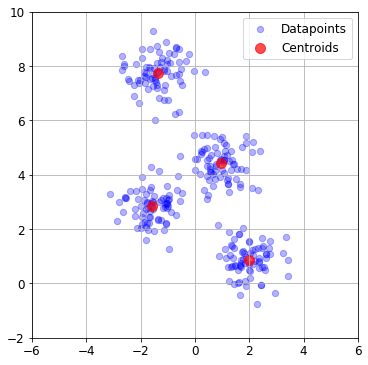

In [17]:
# Calling Our function and compute the total runtime
T0 = time.time()
Centroids = Distribution_Kmeans(X, 4, 20)
T1 = time.time()   

Total_Runtime = T1 - T0

# The value of the centroids and the total runtime
print('\033[1m'+"Centroids:"+'\033[0m')
print(Centroids)
print('\n'+'\033[1m'+"The total runtime of the distributed algorithm, in seconds "+'\033[0m', Total_Runtime)


# A visualization of the data points and the computed centroids
plt.grid()
plt.gca().set_aspect('equal')
plt.rcParams['figure.figsize'] = 8, 6 
plt.rcParams['font.size'] = 12

plt.scatter(X[:, 0], X[:, 1], s = 40, alpha=0.3 ,c='b')
plt.scatter(Centroids[:, 0], Centroids[:, 1], s=100, alpha=0.7 ,c='r')
plt.legend(['Datapoints','Centroids'])
plt.ylim(-2, 10) ,plt.xlim(-6, 6)

plt.show()


<div class="alert alert-block alert-info">
<strong>Question 10.</strong> Answer the following questions:
<br>
<br>
<ul>
    <li>How many partitions did you use? Why?</li>
    <li>What is the size of the dataset you generate? Did you cache the dataset? What's the RAM occupation?</li>
    <li>What is the size of the shuffle data over the network? How does it compare to the dataset size?</li>
</ul>
</div>


<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
    <b> ANSWER: </b>
    <br>
    <br>

To utilize the resources fully within the Spark Workers, We choose to have a number of partitions which is equal to the total number of computation cores in the Spark Workers. Since we have two Spark workers operating each with 3 cores, the best number of partitions to be choosen is <b>six partition</b>. Each three partions are processed within each worker. According to the Spark UI, if we choose a number of partitions which is less than that, we end up with cores in an idle state as the number of operating cores equal to the number of partitions. And in the case where we choose more than six partitions, we end up by having some operations in a waiting state for another core to be available.
    
</div>

In [18]:
print('The dataset size is', sys.getsizeof(X)/1024,'KB')

The dataset size is 4.796875 KB


<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
By Generating the code cell above we can see that the Size of the dataset is almost <b>4.8 kB</b>. 

<br>
Since Spark supports cluster-wide in-memory cache, we have cached the dataset which is represented as partitions distributed among the spark workers since the partitions will be used repeatedly at each iteration since K-means is an iterative algorithm. So instead of recomputing the dependencies of each RDD trasformation or action, we shall keep the RDD which is repeatedly used in memory.
    
    
    
</div>

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
We noticed that the RAM occupation is <b>13.3 KB</b>, this value is found by looking at the Spark Web UI when caching the dataset.
</div>


<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
    The size of the shuffeled data is <b>77.4 KB</b> where approximately 6.6 KB where shuffled at each (iteration) action. The algorithm stopped at 7 iterations. The data is mainly shuffled as I/P data  (shuffle Read) to the driver machine from remote executors in the action collect() as the Spark UI shows.
</div>

<div class="alert alert-block alert-info">
<strong>Question 11.</strong> Comparison between serial and distributed implementations.
<br>
<br>
Given the dataset size you chose for your experiments, answer the following questions:
<ul>
    <li>Which is "faster", the serial or distributed implementation of k-means?</li>
    <li>What is a dataset size for which the distributed implementation is clearly faster than the serial one?</li>
    <li>What would be different in your code, should the input dataset reside on disk? Clearly, the input RDD would be reading from HDFS. Any other differences with respect to partitions?</li>
</ul>
</div>

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
<b> ANSWER: </b>
    <br>
    <br>
In our case the serial implementation of the K-Means algorithm proved to be faster.
    <br><br>
    
    - The runtime of the serial version of K-means is 0.01 seconds
    - The runtime of the distributed version of K-means is 1.9 seconds
    
    The reason behind this is the small size of our dataset. In fact, with the dataset we are using, we can not really appreciate the benefits of distributed computing.

</div>

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 

If the dataset size was bigger than the available memory (RAM) on the machine running the code, the distributed implementation would be surely faster than the serial one. In fact, in such a case, we would need to partially read  our dataset from the secondary memory several times (huge I/O from disk), exponentially increasing the overhead of the computation which would become unfeasible with the serial K-Means. We came to this conclusion also because we tried to increase our dataset size up to 10 million points and we never noticed any performances increases in the distributed algorithm.
</div>

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
In this version of the code, the data is created in the memory of the driver machine and is converted to data partition RDDs (ParallelCollectionRDD) using <i>parallelize(no_partitions)</i> where we choose the number of partitions.<br>
On the other hand, if the dataset resides on HDFS, the data is represented by multiple replicated HDFS blocks among the datanodes of the hadoop cluster. Each unique HDFS block constituting the concerned data, when imported to spark, will be considered as a data parition RDD (ParallelCollectionRDD) automatically when read into our Spark application.
This may create some problems because the number of HDFS blocks constituting our data may not be optimal for the spark workers and lead to performance issues. 
    <br>An alternative is to use <b><i>repartition(no_partitions)</i></b> in order to manipulate the number of partitions forming the concerned data. However, this approach has to be used carrefully since it may create a high I/O overhead and may compromise the performance improvement of repartitioning the data read from HDFS.
</div>